# Simulations

In [54]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
np.random.seed(42) 

#preset the number of simulations we'll have
n_simulations =100_000

<hr style="border:2px solid gray">

### 1. How likely is it that you roll doubles when rolling two dice?

- First, let's look at this without our imports, just with the human eye
- (1,1) (2,2) (3,3) (4,4) (5,5) (6,6) are the double if we have two dice

In [56]:
#6 chances for a double out of 36 rolls
6/36 

0.16666666666666666

- Now, lets use our imports to get an answer via simulation

In [57]:
#number of dice
n_dice = 2 

#possible outcomes
outcomes = [1,2,3,4,5,6]

In [58]:
rolls = np.random.choice(outcomes, size=(n_simulations, n_dice))

#call our variable
rolls

array([[4, 5],
       [3, 5],
       [5, 2],
       ...,
       [3, 2],
       [1, 4],
       [4, 6]])

In [59]:
#let's turn this into a dataframe so we can see our outcomes more clearly
rolls =pd.DataFrame(rolls)

#call our new dataframe
rolls.head()

,0,1
0,4,5
1,3,5
2,5,2
3,3,3
4,3,5


In [60]:
#the average likelyhood that roll in index 0 will equal roll in index 1
(rolls[0] == rolls[1]).mean()

0.16698

<hr style="border:1.5px solid black">

### #2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

In [61]:
#number of coins
n_coins = 8 

#possible outcomes
outcomes = ['H', 'T']

In [62]:
#us random choice to get the simulation
coinflips = np.random.choice(outcomes, size=(n_simulations, n_coins))

#call the variable
coinflips

array([['T', 'H', 'T', ..., 'H', 'H', 'T'],
       ['H', 'T', 'T', ..., 'T', 'H', 'T'],
       ['T', 'H', 'T', ..., 'H', 'T', 'H'],
       ...,
       ['H', 'T', 'T', ..., 'H', 'H', 'T'],
       ['H', 'T', 'T', ..., 'T', 'T', 'T'],
       ['H', 'H', 'H', ..., 'H', 'T', 'H']], dtype='<U1')

In [63]:
#let's look at the possibility of the coinflip being Heads
flips_by_sim = (coinflips == 'H').sum(axis=1)

#call that variable
flips_by_sim

array([3, 3, 4, ..., 3, 3, 6])

##### Landing on Heads exactly 3 times

In [64]:
#what is the possibility of the flips being heads exactly 3 times
(flips_by_sim == 3).mean()

0.21945

##### Landing on Heads more than 3 times

In [65]:
#using data from above
(flips_by_sim > 3).mean()

0.63632

In [66]:
#completely redone
outcomes = ['H','T']
n_coins = 8

coinflips = np.random.choice(outcomes, size=(n_simulations, n_coins))
flips_by_sim = (coinflips == 'H').sum(axis=1)
(flips_by_sim > 3).mean()

0.63592

<hr style="border:1.5px solid black">

### #3 There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

##### First, let's look at this without imports and answer using probability
- 3 webdev per 1 dS == 1/4 classes is DS == 25% of classes are DS
- 2 billboards
- odds of both having a data science student on it
- 25% chance per billboard * 2 billboards = 1/8

In [67]:
(1/4) * (1/4)

0.0625

##### Now, let's answer with simulation

In [68]:
#our possible outcomes with 4 classes
outcomes = ['wd', 'wd', 'wd', 'ds']

#number of billboards
n_billboards = 2

#using random choice, let's see what the outcomes will be
billboards = np.random.choice(outcomes, size=(n_simulations, n_billboards))

#call the variable
billboards

array([['wd', 'ds'],
       ['wd', 'wd'],
       ['ds', 'wd'],
       ...,
       ['wd', 'wd'],
       ['wd', 'wd'],
       ['wd', 'wd']], dtype='<U2')

In [69]:
# our only options are...
outcomes = ['wd','ds']

#using the probability of 1/4 classes being DS, and 3/4 classes being WD
billboards = np.random.choice(outcomes, size=(n_simulations, n_billboards), p=[0.75, 0.25])

#let's see our outcomes
billboards

array([['wd', 'wd'],
       ['ds', 'wd'],
       ['ds', 'wd'],
       ...,
       ['wd', 'wd'],
       ['wd', 'wd'],
       ['ds', 'wd']], dtype='<U2')

In [70]:
#what are the possibilities that the billboard will be exactly data science
(billboards == 'ds').sum(axis=1)

array([0, 1, 1, ..., 0, 0, 1])

In [71]:
#what is the probability that TWO billboards will be exactly data science
prob = ((billboards == 'ds').sum(axis=1) == 2).mean()

#call that variable
prob

0.06275

##### Converting from probability to odds:

In [72]:
# Probability of seeing anything else
1-prob

0.93725

In [73]:
#odds of seeing a builboard that is not WD
odds = prob/(1-prob)
odds

0.06695118698319552

In [74]:
# theoretical prob
0.25 * 0.25

0.0625

<hr style="border:1.5px solid black">

### #4 Codeup students buy, on average, 3 poptart packages (+- 1.5) a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon?

##### Let's break this down

- 1.5-4.5 puchases a day (average 3)
- 17 packages every monday
- probability to buy one on Friday
- Mon:17 - (1.5-4.5) = 15.5-12.5 =day 1 prob = 100%
- Tues: 15-12.5 - (1.5-4.5)= 13.5-8 = day 2 prob 100% 
- Wed:13.5-8 - (1.5-4.5)= 12-3.5 = day 3 prob 100%
- Thurs: 12-3.5 - (1.5-4.5)= 10.5-(-1) = day 4, could have 10.5 or -1 left / 50% chance
- Friday: 10.5 -(-1) - (1.5-4.5) = 9-(-5.5)= day 4, could have 9 or -5.5/ 50% chance

##### Now, let's use simulation

In [75]:
mean = 3 
sd = 1.5

n_days = 5

In [82]:
#let's use random normal becuase we have the mean and sd already
#see what are chances are that poptarts are bought that day
poptarts_bought_day = np.random.normal(mean, sd, size=(n_simulations, n_days))

#take a look at what we get
poptarts_bought_day

array([[ 3.74507123,  2.79260355,  3.97153281,  5.28454478,  2.64876994],
       [ 2.64879456,  5.36881922,  4.15115209,  2.29578842,  3.81384007],
       [ 2.30487346,  2.30140537,  3.36294341,  0.13007963,  0.41262325],
       ...,
       [ 4.35745962,  3.67129666,  6.64200868,  3.38385454,  6.62904717],
       [ 2.0946746 , -0.78190435,  4.15695468, -0.32215048,  3.1578333 ],
       [ 1.87701607,  3.89008518,  0.80976807,  4.12613676,  1.02327673]])

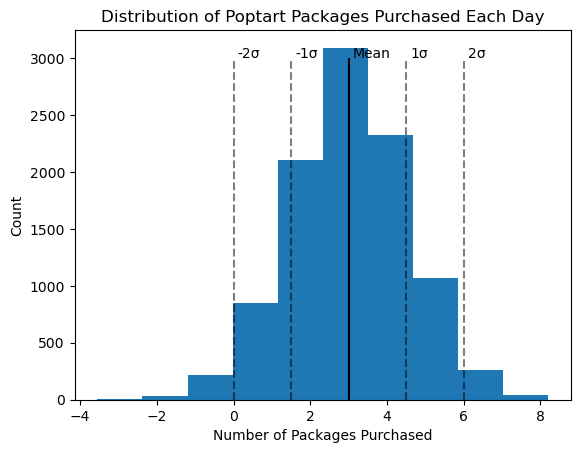

In [77]:
#we can visualize these popart daily purchases if we want to
plt.hist(np.random.normal(3, 1.5, size = (10000)))
plt.title('Distribution of Poptart Packages Purchased Each Day')
plt.vlines(3, 0, 3000, color='black')
plt.text(3.1, 3000, 'Mean')
plt.vlines(4.5, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(4.6, 3000, '1σ')
plt.vlines(6.0, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(6.1, 3000, '2σ')
plt.vlines(1.5, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(1.6, 3000, '-1σ')
plt.vlines(0, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(0.1, 3000, '-2σ')
plt.ylabel('Count')
plt.xlabel('Number of Packages Purchased')
plt.show()

In [83]:
#see what are chances are that poptarts are bought per week
poptarts_bought_per_week = poptarts_bought_day.sum(axis=1)

#call that variable
poptarts_bought_per_week

array([18.44252231, 18.27839437,  8.51192512, ..., 24.68366666,
        8.30540775, 11.72628281])

In [84]:
#probability that less than 17 poptarts are bought that week
(poptarts_bought_per_week <= 16).mean()

0.6175236

<hr style="border:1.5px solid black">

### #5 Compare Heights
- Men have an average height of 178 cm and standard deviation of 8cm.
- Women have a mean of 170, sd = 6cm.
- If a man and woman are chosen at random, P(woman taller than man)?

In [85]:
#men's average height in cm
men_avg= 178
#men's standard deviation in cm
men_std=8

#women's average height in cm
women_avg=170
#women's standard deviation in cm
women_std=6

In [86]:
#using random normal, lets find the average heights of men (in cm) for 100K simulations
height_men = np.random.normal(men_avg, men_std, n_simulations)

#call that variable
height_men

array([170.23685428, 171.42090422, 174.34993101, ..., 191.74389752,
       183.49919519, 186.01675774])

In [87]:
#using random normal, lets find the average heights of women (in cm) for 100K simulations
height_women = np.random.normal(women_avg, women_std, n_simulations)

#call that variable
height_men

array([170.23685428, 171.42090422, 174.34993101, ..., 191.74389752,
       183.49919519, 186.01675774])

In [88]:
#what is the average probability that women are taller then men
(height_women > height_men).mean()

0.2119914

<hr style="border:0.5px solid black">

##### another way to code this same question

In [89]:
men = np.random.normal(178, 8, size = n_simulations)
men

array([176.98316178, 177.83524287, 183.36305153, ..., 163.97269261,
       185.67666653, 181.34953653])

In [90]:
women = np.random.normal(170, 6, size = n_simulations)
women

array([161.30355141, 174.73839353, 170.58327115, ..., 173.79326782,
       175.19930788, 181.07820689])

In [91]:
#probability that women are taller then men on average
(women > men).mean()

0.2120177

<hr style="border:1.5px solid black">

### #6 When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails.
- What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?
- What is the probability that we observe an installation issue within the first 150 students that download anaconda?
- How likely is it that 450 students all download anaconda without an issue?

##### Let's break it down
- prob_fail = 1/250
- 50 students == 0 fails
- 100 students == 0 fails
- 150 students >= 1 fail
- 450 students == 0 fails

##### 50 installs with no issues

In [97]:
#possible outcomes, success or failure
outcomes = ['S', 'F']

n_students = 50

In [98]:
downloads = np.random.choice(outcomes, size=(n_simulations, n_students), p = [249/250, 1/250])
downloads

array([['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ...,
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'F', 'S', 'S']], dtype='<U1')

In [99]:
(downloads == 'S').sum(axis=1)

array([50, 50, 50, ..., 50, 50, 49])

In [100]:
((downloads == 'S').sum(axis=1) == 50).mean()

0.81807

<hr style="border:0.5px solid black">

##### 100 installs

In [102]:
outcomes = ['S', 'F']
n_students = 100

downloads = np.random.choice(outcomes, size=(n_simulations, n_students), p = [249/250, 1/250])

((downloads == 'S').sum(axis=1) < n_students).mean()

0.33083

<hr style="border:0.5px solid black">

##### 150 installs 

In [103]:
outcomes = ['S', 'F']
n_students = 150

downloads = np.random.choice(outcomes, size=(n_simulations, n_students), p = [249/250, 1/250])

((downloads == 'S').sum(axis=1) < n_students).mean()

0.44903

<hr style="border:0.5px solid black">

##### 450 installs

In [105]:
outcomes = ['S', 'F']
n_students = 450

downloads = np.random.choice(outcomes, size=(n_simulations, n_students), p = [249/250, 1/250])

((downloads == 'S').sum(axis=1) == n_students).mean()

0.16296

<hr style="border:1px solid black">

### #7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

In [106]:
n_days = 3

In [107]:
# 0 = no truck, 1 = truck shows up
trucks = np.random.choice([0, 1], size = (n_simulations, n_days), p = [0.3, 0.7])

#call the variable
trucks

array([[1, 1, 1],
       [1, 1, 1],
       [1, 0, 0],
       ...,
       [1, 1, 1],
       [0, 1, 1],
       [1, 0, 1]])

##### probability that no truck shows up in 3 days

In [108]:
#axis 1 is 0 (or no truck shows up)
(trucks.sum(axis = 1) == 0).mean()

0.02708

##### How likely is it that a food truck will show up sometime this week

In [109]:
#likelyhood that in axis 1 there is a 1 (or a truck DOES show up) one or more days
(trucks.sum(axis = 1) >= 1).mean()

0.97292

<hr style="border:1px solid black">

### #8. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?


Let's break it down:
- 365 days in a year
- what's the probability of same birthday

#### 23 students in the class

In [110]:
#number of days in a year
outcomes = range(0, 365) 

#number of students
n_students= 23 

In [111]:
#using random choice to get the possible birthdays
birthdays= np.random.choice(outcomes, size=(n_simulations, n_students))

#call that variable
birthdays

array([[265, 187,  89, ..., 283,  12, 341],
       [100, 287,  19, ..., 327, 230,  63],
       [ 66, 225, 335, ..., 199, 162, 327],
       ...,
       [ 59, 202, 137, ..., 153,  70, 231],
       [166, 353, 311, ..., 200, 178,   4],
       [150, 262,  46, ..., 340, 322, 227]])

In [112]:
#turn it into a DF so it's easier to read
birthdays = pd.DataFrame(birthdays)

#call our new DF
birthdays.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,265,187,89,176,158,81,21,144,52,66,...,321,205,94,139,217,129,165,283,12,341
1,100,287,19,64,338,205,195,259,31,74,...,310,187,32,245,239,69,356,327,230,63
2,66,225,335,187,57,23,55,104,167,293,...,175,6,181,36,285,264,351,199,162,327
3,209,256,203,93,61,264,115,313,144,172,...,60,84,220,328,230,259,193,139,353,12
4,322,282,125,177,83,338,315,354,39,136,...,344,345,35,102,6,270,86,95,289,256


In [113]:
#what are the chances that on average we will have a unique birthday
(birthdays.nunique(axis=1) < 23).mean()

0.51081

<hr style="border:0.5px solid black">

#### 20 students per class

In [114]:
#number of days in a year
outcomes = range(0, 365) 

#number of students
n_students= 20 

In [115]:
#let's see what the possibility of birhtdays is with 20 students
birthdays= np.random.choice(outcomes, size=(n_simulations, n_students))

#turn that into a DF
birthdays = pd.DataFrame(birthdays)

#call the DF
birthdays

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,299,204,316,108,28,101,55,257,124,0,44,28,134,101,121,178,235,190,128,32
1,205,163,110,227,159,231,273,4,188,147,303,222,109,204,304,67,202,209,247,338
2,330,157,68,106,143,91,17,185,26,204,304,136,183,51,89,240,89,339,50,176
3,219,124,84,120,152,212,146,198,274,334,142,151,137,310,248,69,212,114,17,314
4,280,238,83,24,234,11,321,302,195,241,236,73,94,308,130,214,259,165,160,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,247,215,235,220,37,294,8,97,238,217,214,140,234,45,203,286,35,345,88,83
99996,217,216,177,184,126,53,110,49,255,347,292,108,262,248,124,12,304,2,134,2
99997,177,49,34,27,46,37,86,140,194,192,303,152,327,113,0,155,111,293,3,253
99998,314,155,64,289,204,363,73,355,7,256,59,350,358,224,207,304,105,279,38,353


In [116]:
#get the probability
(birthdays.nunique(axis=1) < n_students).mean()

0.41058

<hr style="border:0.5px solid black">

##### 40 students per class

In [117]:
#number of days in a year
outcomes = range(0, 365) 

#number of students
n_students = 40

#let's see what the possibility of birhtdays is with 40 students
birthdays = np.random.choice(outcomes, size=(n_simulations, n_students))

#call the DF
birthdays = pd.DataFrame(birthdays)

In [118]:
#get the probability
(birthdays.nunique(axis=1) < n_students).mean()

0.89183